<a href="https://colab.research.google.com/github/ayarii/learner-engagement/blob/main/new_version_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:

#Import dataset
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/ayarii/learner-engagement/blob/main/Student-engagement-dataset.zip?raw=true",
    extract=False)
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
data_dir = pathlib.Path('/content/datasets/Student-engagement-dataset')
print(data_dir)
print(os.path.abspath(data_dir))



40069772/40069772 [==============================] - 1s 0us/step
/content/datasets/Student-engagement-dataset
/content/datasets/Student-engagement-dataset


Populating the interactive namespace from numpy and matplotlib
Shape of the image (72307,)


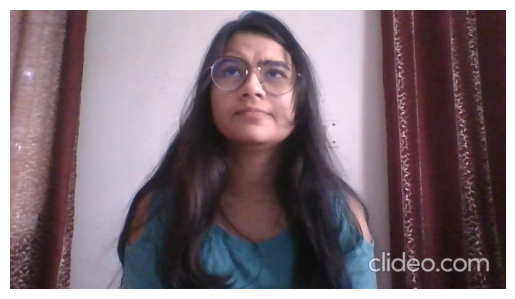

Shape of the image (19745,)


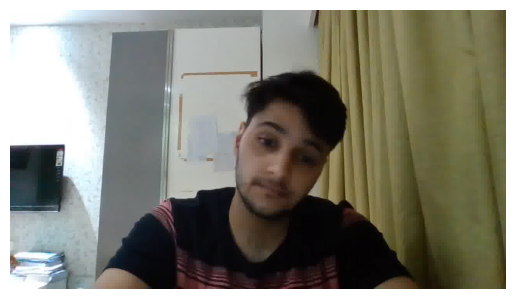

Shape of the image (21216,)


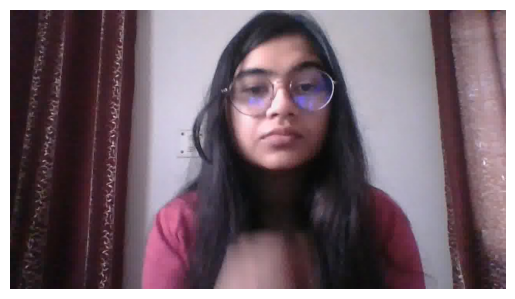

Shape of the image (21813,)


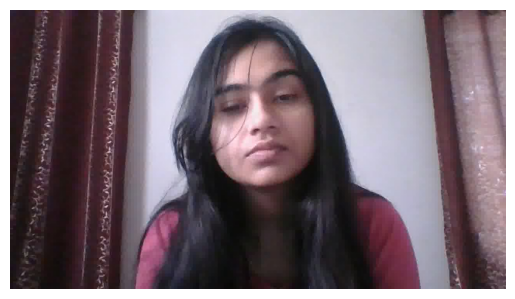

Shape of the image (17353,)


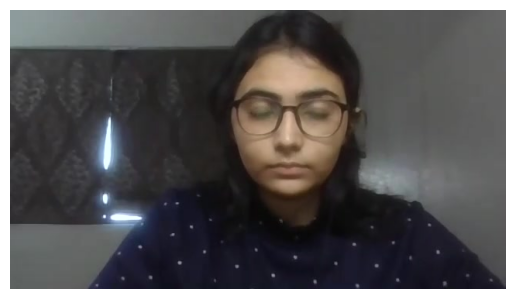

Shape of the image (44759,)


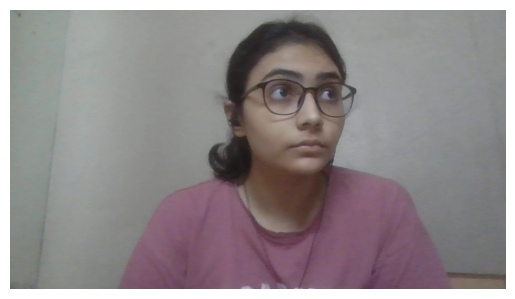

In [3]:

%pylab inline
#learner confused
url_confused = r'https://github.com/ayarii/learner-engagement/blob/main/0020.jpg?raw=true'
resp = requests.get(url_confused, stream=True).raw
image_array_confused = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_confused.shape}')
image_confused = cv2.imdecode(image_array_confused, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_confused, cv2.COLOR_BGR2RGB))
plt.show()

#learner frustrated
url_frustrated = r'https://github.com/ayarii/learner-engagement/blob/main/135.jpg?raw=true'
resp = requests.get(url_frustrated, stream=True).raw
image_array_frustrated= np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_frustrated.shape}')
image_frustrated = cv2.imdecode(image_array_frustrated, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_frustrated, cv2.COLOR_BGR2RGB))
plt.show()

#learner engaged
url_engaged = r'https://github.com/ayarii/learner-engagement/blob/main/0076.jpg?raw=true'
resp = requests.get(url_engaged, stream=True).raw
image_array_engagement = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_engagement.shape}')
image_engagement = cv2.imdecode(image_array_engagement, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
plt.show()

#learner bored
url_bored = r'https://github.com/ayarii/learner-engagement/blob/main/0153.jpg?raw=true'
resp = requests.get(url_bored, stream=True).raw
image_array_bored = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_bored.shape}')
image_bored = cv2.imdecode(image_array_bored, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_bored, cv2.COLOR_BGR2RGB))
plt.show()

#learner drowsy
url_drowsy = r'https://github.com/ayarii/learner-engagement/blob/main/0021.jpg?raw=true'
resp = requests.get(url_drowsy, stream=True).raw
image_array_drowsy = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_drowsy.shape}')
image_drowsy = cv2.imdecode(image_array_drowsy, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_drowsy, cv2.COLOR_BGR2RGB))
plt.show()

# learner looking_away
url_looking_away = r'https://github.com/ayarii/learner-engagement/blob/main/0011.jpg?raw=true'
resp = requests.get(url_looking_away, stream=True).raw
image_array_looking_away = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_looking_away.shape}')
image_looking_away = cv2.imdecode(image_array_looking_away, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_looking_away, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:

#Train CNN using data-augmentation
# Create an instance of the ImageDataGenerator for data augmentation
batch_size = 32
img_height = 200
img_width = 200
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation
)

# Generate training dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical',  # Assuming you have categorical labels
    subset='training'  # Specify the subset as training
)

# Generate validation dataset
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical',
    subset='validation'  # Specify the subset as validation
)

# Verify the class indices
print(train_generator.class_indices)
print(train_generator)

Found 1699 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}


Number of augmented samples: 54
Class 0: 339 samples
Class 1: 287 samples
Class 2: 296 samples
Class 3: 211 samples
Class 4: 278 samples
Class 5: 288 samples
Number of original samples: 1699
Batch size during training: 32
Number of augmented samples per epoch: 54368
Number of epochs: 100
Total number of augmented samples: 5436800


<ipython-input-5-7f71695e6234>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  count = sum(1 for label in class_distribution if label == class_label)


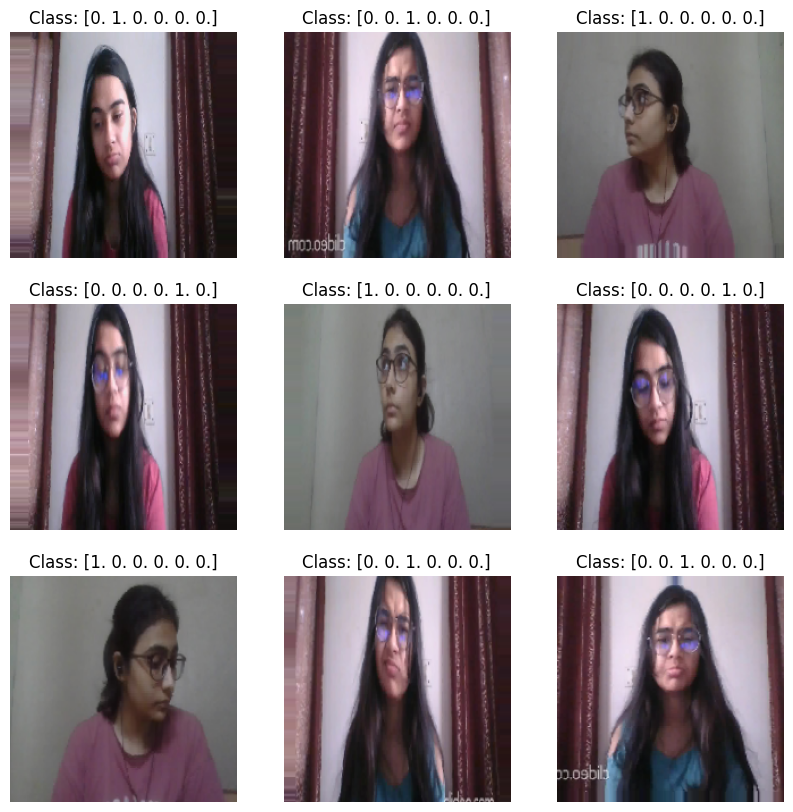

In [5]:

#The number of samples in your dataset after applying data augmentation.
num_original_samples = len(train_generator.filenames)  # Number of original samples in your dataset
batch_size = train_generator.batch_size  # Batch size used during training
num_augmented_samples_per_epoch = num_original_samples * batch_size
num_epochs = 100  # Replace with the actual number of epochs
total_augmented_samples = num_epochs * num_augmented_samples_per_epoch

# Number of Samples:
num_samples = len(train_generator)
print("Number of augmented samples:", num_samples)

#Class Distribution:
class_distribution = train_generator.classes
unique_classes = set(class_distribution)

for class_label in unique_classes:
    count = sum(1 for label in class_distribution if label == class_label)
    print(f"Class {class_label}: {count} samples")

# Print the results
print("Number of original samples:", num_original_samples)
print("Batch size during training:", batch_size)
print("Number of augmented samples per epoch:", num_augmented_samples_per_epoch)
print("Number of epochs:", num_epochs)
print("Total number of augmented samples:", total_augmented_samples)


#Visual Inspection:
import matplotlib.pyplot as plt

# Display a few augmented images
images, labels = train_generator.next()

plt.figure(figsize=(10, 10))
for i in range(min(9, batch_size)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.axis("off")

plt.show()

In [6]:

#create the model
num_classes = 6
img_size = (200, 200,3)
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200, 200, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9

In [7]:

# Set up callbacks
log_dir = "logs/"
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:

# Compile your model

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])



In [9]:

# Train your model using the augmented dataset
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=[tensorboard_callback, early_stopping])

Epoch 1/100
54/54 [==============================] - 30s 461ms/step - loss: 1.7886 - accuracy: 0.1989 - val_loss: 1.7840 - val_accuracy: 0.1995
Epoch 2/100
54/54 [==============================] - 24s 454ms/step - loss: 1.7597 - accuracy: 0.2531 - val_loss: 1.6469 - val_accuracy: 0.3634
Epoch 3/100
54/54 [==============================] - 26s 475ms/step - loss: 1.0714 - accuracy: 0.5856 - val_loss: 0.8799 - val_accuracy: 0.6366
Epoch 4/100
54/54 [==============================] - 24s 448ms/step - loss: 0.4286 - accuracy: 0.8440 - val_loss: 0.6308 - val_accuracy: 0.7387
Epoch 5/100
54/54 [==============================] - 24s 450ms/step - loss: 0.2822 - accuracy: 0.8882 - val_loss: 0.6959 - val_accuracy: 0.8005
Epoch 6/100
54/54 [==============================] - 24s 450ms/step - loss: 0.2100 - accuracy: 0.9276 - val_loss: 0.7092 - val_accuracy: 0.7743
Epoch 7/100
54/54 [==============================] - 25s 467ms/step - loss: 0.1772 - accuracy: 0.9353 - val_loss: 0.8063 - val_accuracy:

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator, verbose=0)
print(f'vall loss: {loss:.4f}')
print(f'vall accuracy: {accuracy:.4f}')

vall loss: 0.6709
vall accuracy: 0.7221


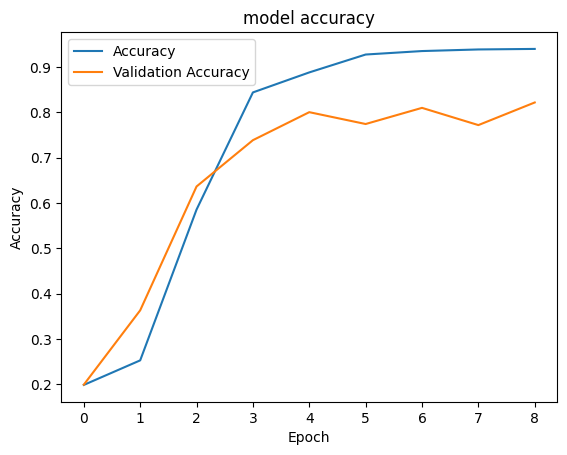

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

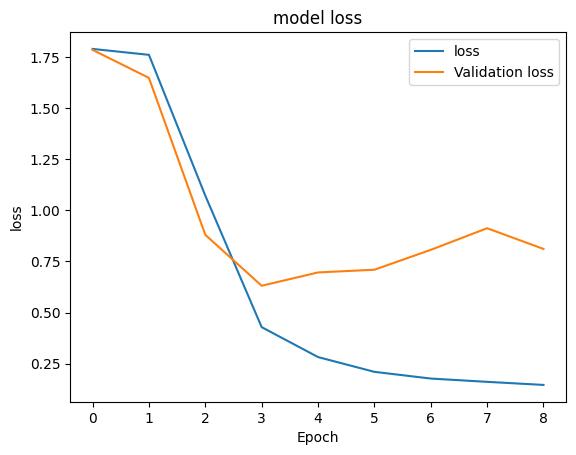

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation loss"])
plt.show()

In [14]:
from keras.optimizers import Adam
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (1,1), activation='relu', input_shape=img_size),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(64, (1,1), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(128, (1,1), activation='relu'),
     keras.layers.Conv2D(128, (5,5), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(256, (1,1), activation='relu'),
     keras.layers.Conv2D(256, (5,5), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])
model.summary()

model.compile(optimizer=Adam() ,loss="categorical_crossentropy", metrics = ['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 200, 200, 32)      128       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 66, 66, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 66, 66, 64)        2112      
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 128)      

In [17]:
checkpoint = ModelCheckpoint("Student Engagement Model.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)


history = model.fit(  train_generator,validation_data=val_generator
                           ,epochs=100,callbacks=[checkpoint,early_stopping])


Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 1.2397 - accuracy: 0.4479
Epoch 1: val_accuracy improved from -inf to 0.76247, saving model to Student Engagement Model.h5
54/54 [==============================] - 30s 451ms/step - loss: 1.2397 - accuracy: 0.4479 - val_loss: 0.9133 - val_accuracy: 0.7625
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/54 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.8517
Epoch 2: val_accuracy improved from 0.76247 to 0.77435, saving model to Student Engagement Model.h5
54/54 [==============================] - 24s 453ms/step - loss: 0.3623 - accuracy: 0.8517 - val_loss: 0.5770 - val_accuracy: 0.7743
Epoch 3/100
54/54 [==============================] - ETA: 0s - loss: 0.1875 - accuracy: 0.9258
Epoch 3: val_accuracy improved from 0.77435 to 0.82660, saving model to Student Engagement Model.h5
54/54 [==============================] - 25s 460ms/step - loss: 0.1875 - accuracy: 0.9258 - val_loss: 0.4210 - val_accuracy: 0.8266
Epoch 4/100
54/54 [==============================] - ETA: 0s - loss: 0.1242 - accuracy: 0.9470
Epoch 4: val_accuracy improved from 0.82660 to 0.84561, saving model to Student Engagement Model.h5
54/54 [==============================] - 24s 445ms/step - loss: 0.1242 - accuracy: 0.9470 - val_loss: 0.3791 - val_accuracy: 0.8456
Epoch 5/100
54/54 [============

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator, verbose=0)
print(f'vall loss: {loss:.4f}')
print(f'vall accuracy: {accuracy:.4f}')

vall loss: 0.2626
vall accuracy: 0.8741


In [29]:
test_loss, test_accuracy = model.evaluate(x=x_test,y=y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

NameError: name 'x_test' is not defined

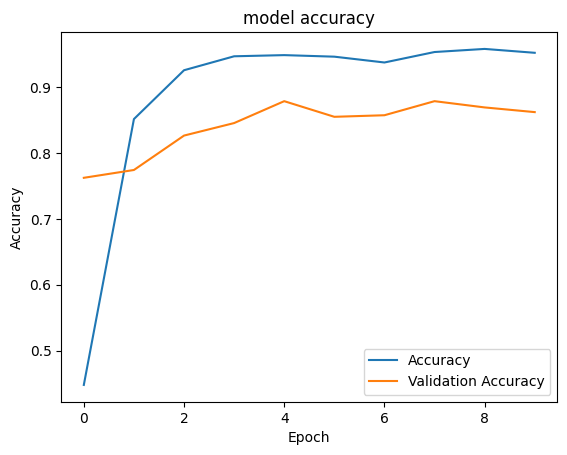

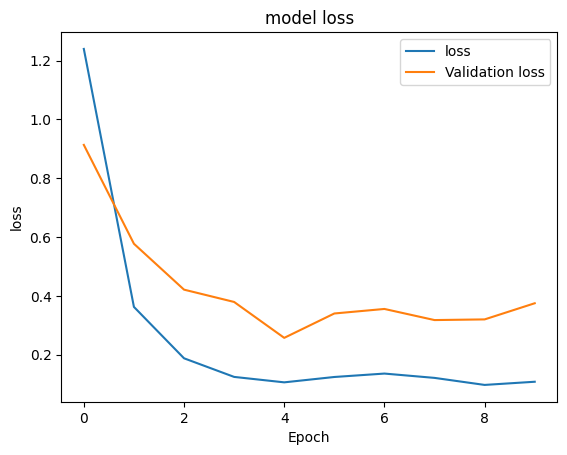

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation loss"])
plt.show()

In [21]:
history.history["accuracy"][-1]

0.9523248672485352

**Image Prediction**





Saving 0076.jpg to 0076.jpg


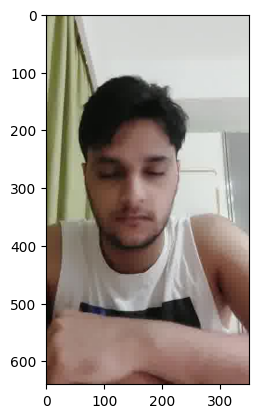

1/1 [==============================] - 0s 18ms/step


In [28]:
# Cette ligne importe la bibliothèque "files" de Google Colab, qui permet de charger des fichiers depuis votre ordinateur vers l'environnement Colab.
from google.colab import files
# Cette ligne demande à l'utilisateur de télécharger un fichier (une image dans ce cas) vers l'environnement Colab. Le fichier téléchargé sera stocké dans la variable file_to_predict.
file_to_predict = files.upload()
# Cette ligne itère sur les fichiers téléchargés (dans le cas où plusieurs fichiers auraient été téléchargés) et effectue les étapes suivantes pour chaque fichier.
for file_ in file_to_predict:
  #Cette ligne utilise la fonction cv2.imread de la bibliothèque OpenCV pour lire l'image téléchargée à partir du fichier.
  #L'image est stockée dans la variable image_to_predict.
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    #Cette ligne affiche l'image en utilisant plt.imshow de la bibliothèque matplotlib.
    #cv2.cvtColor est utilisé pour convertir l'image du format BGR (utilisé par OpenCV) en format RGB (utilisé par matplotlib).
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    #Cette ligne redimensionne l'image à une taille de 200x200 pixels à l'aide de cv2.resize et l'expands en ajoutant une dimension supplémentaire à l'aide de np.expand_dims.
    #Cela est nécessaire pour que l'image corresponde à la forme attendue par le modèle (une seule image avec les dimensions spécifiées).
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    #Cette ligne effectue la prédiction en utilisant le modèle CNN entraîné (model.predict). La variable res contient les résultats de la prédiction.
    res = model.predict(img_to_predict)
predicted_class = np.argmax(res)  # Obtient l'indice de la classe prédite avec la plus haute probabilité
if predicted_class == 0:
    plt.imshow(cv2.cvtColor(image_engagement, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Learner Engaged!")
elif predicted_class == 1:
   # plt.imshow(cv2.cvtColor(image_notEngaged, cv2.COLOR_BGR2RGB))
    plt.show()
    print("Learner Not engaged!")
#Ce code permet de charger une image, de faire des prédictions avec le modèle CNN et d'afficher une image correspondant